Final Centroids (Cluster Centers):
[[ 5.83333333  5.33333333]
 [25.         25.        ]]

Cluster Assignments:
Point A: Cluster 1
Point B: Cluster 1
Point C: Cluster 1
Point D: Cluster 1
Point E: Cluster 1
Point F: Cluster 1
Point G: Cluster 2


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


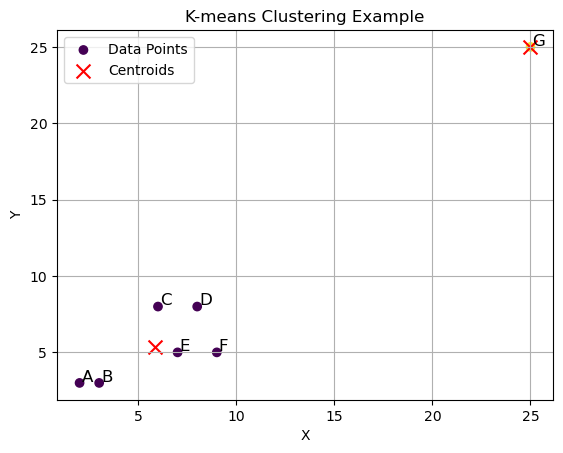

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

# Set environment variable to fix Windows MKL issue
os.environ["OMP_NUM_THREADS"] = "1"

# Define the data points (A, B, C, D, E, F)
data = np.array([
    [2, 3],  # Point A
    [3, 3],  # Point B
    [6, 8],  # Point C
    [8, 8],  # Point D
    [7, 5],  # Point E
    [9, 5],  # Point F
    [25, 25] # Outlier
])

# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, n_init="auto", random_state=0).fit(data)

# Get the cluster centers (centroids) and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Print the final centroids and cluster assignments
print("Final Centroids (Cluster Centers):")
print(centroids)

print("\nCluster Assignments:")
for i, label in enumerate(labels):
    print(f"Point {chr(65+i)}: Cluster {label+1}")

# Plot the data points and the centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

# Annotate points
for i, point in enumerate(data):
    plt.text(point[0]+0.1, point[1]+0.1, f'{chr(65+i)}', fontsize=12)

plt.title('K-means Clustering Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import pandas as pd
df = pd.read_csv('kmeans_dataset_with_outliers.csv')
df

,X,Y,Label
0,1.248357,1.760413,Cluster 1
1,0.930868,1.907171,Cluster 1
2,1.323844,1.446833,Cluster 1
3,1.761515,1.401897,Cluster 1
4,0.882923,2.406263,Cluster 1
...,...,...,...
195,-22.261882,-31.187884,Outlier
196,-3.630160,-14.664777,Outlier
197,8.365611,-42.226536,Outlier
198,47.439481,48.621074,Outlier


          X         Y      Label
0  1.248357  1.760413  Cluster 1
1  0.930868  1.907171  Cluster 1
2  1.323844  1.446833  Cluster 1
3  1.761515  1.401897  Cluster 1
4  0.882923  2.406263  Cluster 1

Final Centroids (Cluster Centers):
[[  4.00531893   4.36387374]
 [-30.56466691  37.32771148]]

Cluster Assignments:
Point 1 (1.2483570765056164, 1.760412881077355): Cluster 1
Point 2 (0.9308678494144076, 1.9071705116680917): Cluster 1
Point 3 (1.3238442690503462, 1.446832512996986): Cluster 1
Point 4 (1.7615149282040128, 1.4018966879596646): Cluster 1
Point 5 (0.882923312638332, 2.406262911197099): Cluster 1
Point 6 (0.8829315215254098, 2.678120014285412): Cluster 1
Point 7 (1.7896064077536955, 1.963994939209833): Cluster 1
Point 8 (1.3837173645764544, 2.501766448946012): Cluster 1
Point 9 (0.7652628070325239, 2.180818012523817): Cluster 1
Point 10 (1.2712800217929825, 1.6774401226974378): Cluster 1
Point 11 (0.7682911535937689, 2.180697802754207): Cluster 1
Point 12 (0.7671351232148715, 2.

C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


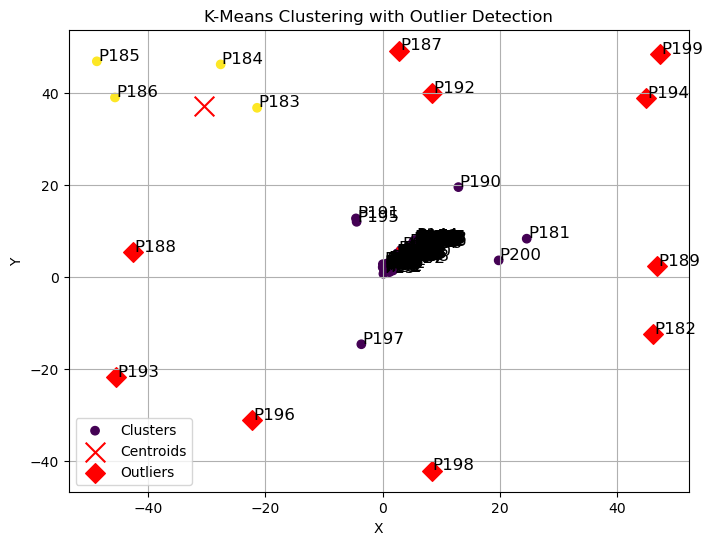

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset from CSV
df = pd.read_csv('kmeans_dataset_with_outliers.csv')

# Check the first few rows to verify data structure
print(df.head())

# Extract X and Y coordinates for clustering
data = df[['X', 'Y']].values

# Perform K-Means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
labels = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

# Add cluster labels to the dataset
df['Cluster'] = labels

# Identify potential outliers (points far from centroids)
distances = np.min(kmeans.transform(data), axis=1)
outlier_threshold = np.percentile(distances, 95)  # Top 5% as outliers
df['Outlier'] = distances > outlier_threshold

# Print Final Centroids
print("\nFinal Centroids (Cluster Centers):")
print(centroids)

# Print Cluster Assignments with Outlier Detection
print("\nCluster Assignments:")
for i, (x, y, cluster, is_outlier) in enumerate(df[['X', 'Y', 'Cluster', 'Outlier']].values):
    status = "Outlier" if is_outlier else f"Cluster {cluster+1}"
    print(f"Point {i+1} ({x}, {y}): {status}")

# Plot Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], c=df['Cluster'], cmap='viridis', marker='o', label='Clusters')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

# Highlight Outliers
outliers = df[df['Outlier']]
plt.scatter(outliers['X'], outliers['Y'], c='red', marker='D', s=100, label='Outliers')

# Annotate Points
for i, row in df.iterrows():
    plt.text(row['X'] + 0.2, row['Y'] + 0.2, f'P{i+1}', fontsize=12)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering with Outlier Detection')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

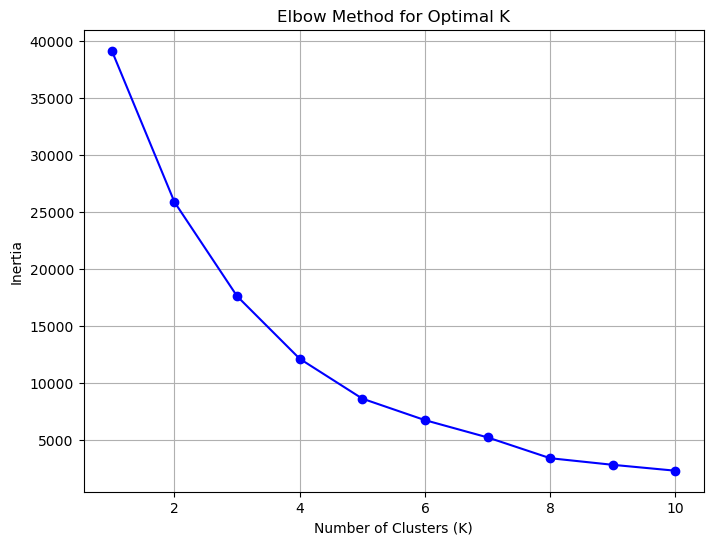

In [21]:
# Elbow Method to Determine Optimal K
inertia = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [28]:
#Heirarchial clustering
#ex of agglomerative clustering(bottom to up approach)
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1,2],[1,4],[1,0],
               [4,2],[4,4],[4,0]])

clustering = AgglomerativeClustering(n_clusters=2).fit(X)
print(clustering.labels_)

[1 1 1 0 0 0]


***Divisive clustering***

It is also known as top-down approach

this algo does not require to prespecify the no of clusters


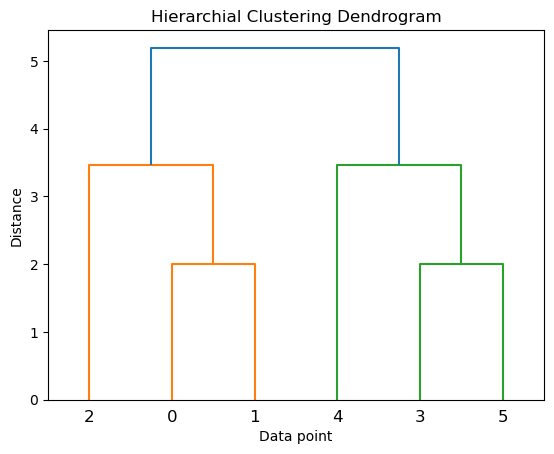

In [43]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt

X = np.array([[1,2],[1,4],[1,0],
              [4,2],[4,4],[4,0]])
Z = linkage(X,'ward')
dendrogram(Z)
plt.title('Hierarchial Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()